In [6]:
import torch
import pickle
import textwrap
import numpy as np 
import pandas as pd 
from pprint import pprint
from transformers import pipeline
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

### BLEU (BiLingual Evaluation Understudy) Score use to evaluate Seq2Seq model inference

In [2]:
# compile eng-spa translations
eng2spa = {}
for line in open('data/spa.txt'):
    line = line.rstrip()
    eng, spa = line.split("\t")
    if eng not in eng2spa:
        eng2spa[eng] = []
    eng2spa[eng].append(spa)
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

## Data Preprocessing

In [3]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [4]:
tokenizer.tokenize('¿Qué me cuentas?'.lower())

['qué', 'me', 'cuentas']

##### Test BLEU score

In [7]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

c:\Users\Legion\.conda\envs\torch113\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Legion\.conda\envs\torch113\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [8]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split())

1.2213386697554703e-77

In [9]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [10]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens
eng2spa_tokens

{'Go.': [['ve'], ['vete'], ['vaya'], ['váyase']],
 'Hi.': [['hola']],
 'Run!': [['corre']],
 'Run.': [['corred']],
 'Who?': [['quién']],
 'Fire!': [['fuego'], ['incendio'], ['disparad']],
 'Help!': [['ayuda'], ['socorro', 'auxilio'], ['auxilio']],
 'Jump!': [['salta']],
 'Jump.': [['salte']],
 'Stop!': [['parad'], ['para'], ['pare']],
 'Wait!': [['espera']],
 'Wait.': [['esperen']],
 'Go on.': [['continúa'], ['continúe']],
 'Hello!': [['hola']],
 'I ran.': [['corrí'], ['corría']],
 'I try.': [['lo', 'intento']],
 'I won!': [['he', 'ganado']],
 'Oh no!': [['oh', 'no']],
 'Relax.': [['tomátelo', 'con', 'soda']],
 'Smile.': [['sonríe']],
 'Attack!': [['al', 'ataque'], ['atacad']],
 'Get up.': [['levanta']],
 'Go now.': [['ve', 'ahora', 'mismo']],
 'Got it!': [['lo', 'tengo']],
 'Got it?': [['lo', 'pillas'], ['entendiste']],
 'He ran.': [['él', 'corrió']],
 'Hop in.': [['métete', 'adentro']],
 'Hug me.': [['abrázame']],
 'I fell.': [['me', 'caí']],
 'I know.': [['yo', 'lo', 'sé']],
 'I lef

## NMT Model

In [12]:
from transformers import pipeline
translator = pipeline(
                      "translation",
                      model='Helsinki-NLP/opus-mt-en-es', 
                      device='cuda:0'
                      )

In [13]:
translator("I like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [19]:
source_subset = list(eng2spa_tokens.keys())[:100]
translations = translator(source_subset)
translations

c:\Users\Legion\.conda\envs\torch113\lib\site-packages\transformers\pipelines\base.py:1045: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


[{'translation_text': 'Vete.'},
 {'translation_text': 'Hola.'},
 {'translation_text': '¡Corre!'},
 {'translation_text': 'Corre.'},
 {'translation_text': '¿Quién?'},
 {'translation_text': '¡Fuego!'},
 {'translation_text': '¡Socorro!'},
 {'translation_text': '¡Salta!'},
 {'translation_text': 'Salta.'},
 {'translation_text': '¡Alto!'},
 {'translation_text': '¡Espera!'},
 {'translation_text': 'Espera.'},
 {'translation_text': 'Vamos.'},
 {'translation_text': '¡Hola!'},
 {'translation_text': 'Corrí.'},
 {'translation_text': 'Lo intento.'},
 {'translation_text': '¡Gané!'},
 {'translation_text': '¡Oh, no!'},
 {'translation_text': 'Relájate.'},
 {'translation_text': 'Sonríe.'},
 {'translation_text': '¡Ataquen!'},
 {'translation_text': 'Levántate.'},
 {'translation_text': 'Vete ahora.'},
 {'translation_text': '¡Lo tengo!'},
 {'translation_text': '¿Entendido?'},
 {'translation_text': 'Huyó.'},
 {'translation_text': 'Sube.'},
 {'translation_text': 'Abrázame.'},
 {'translation_text': 'Me caí.'},
 

In [24]:
bleu_scores = []
for eng, pred in zip(source_subset, translations):
    spa_list = eng2spa_tokens[eng]
    pred = pred['translation_text']
    pred = tokenizer.tokenize(pred.lower())

    print("Source : ", eng)
    print("Target : ", spa_list)
    print("Predicted : ", pred)
    print("BLEU Score : ", sentence_bleu(spa_list, pred))
    print("\n")
    bleu_scores.append(sentence_bleu(spa_list, pred))

Source :  Go.
Target :  [['ve'], ['vete'], ['vaya'], ['váyase']]
Predicted :  ['vete']
BLEU Score :  1.821831989445342e-231


Source :  Hi.
Target :  [['hola']]
Predicted :  ['hola']
BLEU Score :  1.821831989445342e-231


Source :  Run!
Target :  [['corre']]
Predicted :  ['corre']
BLEU Score :  1.821831989445342e-231


Source :  Run.
Target :  [['corred']]
Predicted :  ['corre']
BLEU Score :  0


Source :  Who?
Target :  [['quién']]
Predicted :  ['quién']
BLEU Score :  1.821831989445342e-231


Source :  Fire!
Target :  [['fuego'], ['incendio'], ['disparad']]
Predicted :  ['fuego']
BLEU Score :  1.821831989445342e-231


Source :  Help!
Target :  [['ayuda'], ['socorro', 'auxilio'], ['auxilio']]
Predicted :  ['socorro']
BLEU Score :  1.821831989445342e-231


Source :  Jump!
Target :  [['salta']]
Predicted :  ['salta']
BLEU Score :  1.821831989445342e-231


Source :  Jump.
Target :  [['salte']]
Predicted :  ['salta']
BLEU Score :  0


Source :  Stop!
Target :  [['parad'], ['para'], ['pare'

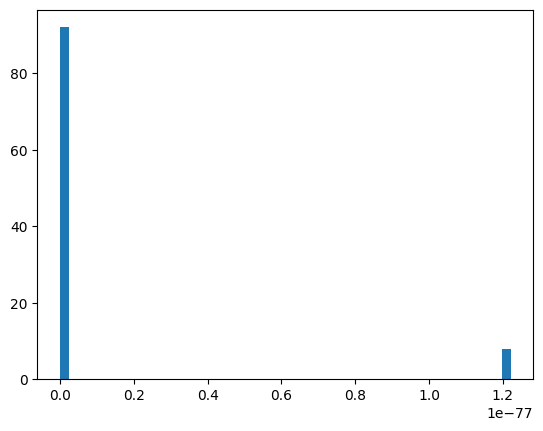

In [25]:
import matplotlib.pyplot as plt
plt.hist(bleu_scores, bins=50);